In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [85]:
# Data untuk Custom CNN
cnn_data = {
    'Model': ['Custom CNN'] * 12,
    'Train-Valid Split': ['70:30'] * 6 + ['80:20'] * 6,
    'Image Size': [256, 256, 448, 448, 512, 512] * 2,
    'Batch Size': [32, 64] * 6,
    'Epoch': [104, 149, 101, 100, 92, 100, 71, 92, 57, 76, 55, 36],
    'Training Time per Epoch': ['34.80 s/epoch', '33.18 s/epoch', '37.24 s/epoch', '39.06 s/epoch', '38.54 s/epoch', '39.69 s/epoch',
                                 '34.10 s/epoch', '32.35 s/epoch', '38.70 s/epoch', '38.04 s/epoch', '40.46 s/epoch', '40.65 s/epoch'],
    'Total Training Time': ['60 min 18 sec', '82 min 23 sec', '62 min 40 sec', '65 min 5 sec', '59 min 5 sec', '66 min 8 sec',
                            '40 min 21 sec', '49 min 36 sec', '36 min 46 sec', '48 min 11 sec', '37 min 5 sec', '24 min 23 sec'],
    'Accuracy': [0.68, 0.61, 0.58, 0.67, 0.56, 0.64, 0.69, 0.67, 0.56, 0.51, 0.59, 0.79],
    'F1-Macro': [0.66, 0.60, 0.56, 0.65, 0.55, 0.62, 0.66, 0.65, 0.54, 0.51, 0.58, 0.74],
    'Precision-Macro': [0.68, 0.64, 0.62, 0.68, 0.63, 0.64, 0.68, 0.67, 0.61, 0.62, 0.62, 0.73],
    'Recall-Macro': [0.75, 0.69, 0.66, 0.75, 0.66, 0.69, 0.75, 0.74, 0.64, 0.64, 0.67, 0.77],
    'ROC-AUC Score': [0.81, 0.74, 0.69, 0.79, 0.67, 0.73, 0.78, 0.78, 0.69, 0.68, 0.72, 0.86],
    'Scenario': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
}

# Data untuk VGG-19
vgg_data = {
    'Model': ['VGG-19'] * 12,
    'Train-Valid Split': ['70:30'] * 6 + ['80:20'] * 6,
    'Image Size': [256, 256, 448, 448, 512, 512] * 2,
    'Batch Size': [32, 64] * 6,
    'Epoch': [40, 12, 22, None, None, None, 17, 19, 16, None, None, None],
    'Training Time per Epoch': ['38.10 s/epoch', '49.98 s/epoch', '51.14 s/epoch', None, None, None, '42.42 s/epoch', '42.88 s/epoch', '59.54 s/epoch', None, None, None],
    'Total Training Time': ['25 min 24 sec', '9 min 59 sec', '18 min 45 sec', None, None, None, '12 min 1 sec', '13 min 34 sec', '15 min 52 sec', None, None, None],
    'Accuracy': [0.85, 0.76, 0.76, None, None, None, 0.78, 0.75, 0.77, None, None, None],
    'F1-Macro': [0.75, 0.43, 0.52, None, None, None, 0.59, 0.46, 0.57, None, None, None],
    'Precision-Macro': [0.88, 0.38, 0.66, None, None, None, 0.75, 0.58, 0.67, None, None, None],
    'Recall-Macro': [0.71, 0.50, 0.54, None, None, None, 0.58, 0.51, 0.57, None, None, None],
    'ROC-AUC Score': [0.89, 0.33, 0.67, None, None, None, 0.83, 0.72, 0.70, None, None, None],
    'Scenario': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
}

# Data untuk EfficientNetV2B2
effnet_data = {
    'Model': ['EfficientNetV2B2'] * 12,
    'Train-Valid Split': ['70:30'] * 6 + ['80:20'] * 6,
    'Image Size': [256, 256, 448, 448, 512, 512] * 2,
    'Batch Size': [32, 64] * 6,
    'Epoch': [37, 60, 52, None, 46, None, 39, 48, 37, None, 32, None],
    'Training Time per Epoch': ['42.43 s/epoch', '39.49 s/epoch', '43.62 s/epoch', None, '46.31 s/epoch', None, '41.66 s/epoch', '40.74 s/epoch', '46.92 s/epoch', None, '50.50 s/epoch', None],
    'Total Training Time': ['26 min 9 sec', '31 min 22 sec', '37 min 48 sec', None, '35 min 30 sec', None, '27 min 4 sec', '32 min 35 sec', '28 min 56 sec', None, '26 min 56 sec', None],
    'Accuracy': [0.88, 0.87, 0.94, None, 0.94, None, 0.87, 0.86, 0.92, None, 0.93, None],
    'F1-Macro': [0.84, 0.82, 0.93, None, 0.91, None, 0.83, 0.82, 0.89, None, 0.91, None],
    'Precision-Macro': [0.83, 0.83, 0.92, None, 0.92, None, 0.81, 0.80, 0.88, None, 0.90, None],
    'Recall-Macro': [0.87, 0.81, 0.93, None, 0.90, None, 0.86, 0.84, 0.90, None, 0.92, None],
    'ROC-AUC Score': [0.94, 0.93, 0.98, None, 0.98, None, 0.93, 0.94, 0.97, None, 0.98, None],
    'Scenario': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
}

# Membuat DataFrames
cnn_df = pd.DataFrame(cnn_data)
vgg_df = pd.DataFrame(vgg_data)
effnet_df = pd.DataFrame(effnet_data)

# Menggabungkan semua DataFrame menjadi satu
combined_df = pd.concat([cnn_df, vgg_df, effnet_df], ignore_index=True)

# Update the DataFrame to include a 'Scenario' column for hue
combined_df['Keterangan Scenario'] = combined_df['Train-Valid Split'] + ' | ' + combined_df['Image Size'].astype(str) + ' | ' + combined_df['Batch Size'].astype(str) + ' (S' + combined_df['Scenario'].astype(str) + ')'

# Replace 'Out of memory' and None with 0
combined_df.fillna(0, inplace=True)

# Convert columns to numeric where appropriate
for col in ['Accuracy', 'F1-Macro', 'Precision-Macro', 'Recall-Macro', 'ROC-AUC Score']:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Print the DataFrame to check
combined_df


,Model,Train-Valid Split,Image Size,Batch Size,Epoch,Training Time per Epoch,Total Training Time,Accuracy,F1-Macro,Precision-Macro,Recall-Macro,ROC-AUC Score,Scenario,Keterangan Scenario
0,Custom CNN,70:30,256,32,104.0,34.80 s/epoch,60 min 18 sec,0.68,0.66,0.68,0.75,0.81,1,70:30 | 256 | 32 (S1)
1,Custom CNN,70:30,256,64,149.0,33.18 s/epoch,82 min 23 sec,0.61,0.60,0.64,0.69,0.74,2,70:30 | 256 | 64 (S2)
2,Custom CNN,70:30,448,32,101.0,37.24 s/epoch,62 min 40 sec,0.58,0.56,0.62,0.66,0.69,3,70:30 | 448 | 32 (S3)
3,Custom CNN,70:30,448,64,100.0,39.06 s/epoch,65 min 5 sec,0.67,0.65,0.68,0.75,0.79,4,70:30 | 448 | 64 (S4)
4,Custom CNN,70:30,512,32,92.0,38.54 s/epoch,59 min 5 sec,0.56,0.55,0.63,0.66,0.67,5,70:30 | 512 | 32 (S5)
5,Custom CNN,70:30,512,64,100.0,39.69 s/epoch,66 min 8 sec,0.64,0.62,0.64,0.69,0.73,6,70:30 | 512 | 64 (S6)
6,Custom CNN,80:20,256,32,71.0,34.10 s/epoch,40 min 21 sec,0.69,0.66,0.68,0.75,0.78,7,80:20 | 256 | 32 (S7)
7,Custom CNN,80:20,256,64,92.0,32.35 s/epoch,49 min 36 sec,0.67,0.65,0.67,0.74,0.78,8,80:20 | 256 | 64 (S8)
8,Custom CNN,80:20,448,32,57.0,38.70 s/epoch,36 min 46 sec,0.56,0.54,0.61,0.64,0.69,9,80:20 | 448 | 32 (S9)
9,Custom CNN,80:20,448,64,76.0,38.04 s/epoch,48 min 11 sec,0.51,0.51,0.62,0.64,0.68,10,80:20 | 448 | 64 (S10)


/tmp/ipykernel_33/1424639681.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=combined_df, x='Model', y='Accuracy', hue='Scenario', palette='tab20', ci=None)
/tmp/ipykernel_33/1424639681.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=combined_df, x='Model', y='F1-Macro', hue='Scenario', palette='tab20', ci=None)
/tmp/ipykernel_33/1424639681.py:76: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=combined_df, x='Model', y='Precision-Macro', hue='Scenario', palette='tab20', ci=None)
/tmp/ipykernel_33/1424639681.py:86: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=combined_df, x='Model', y='Recall-Macro', hue='Scenario', palette='tab20', ci=None)
/tmp/ipykernel_33/1424639681.py:96: FutureWarning: 

The 

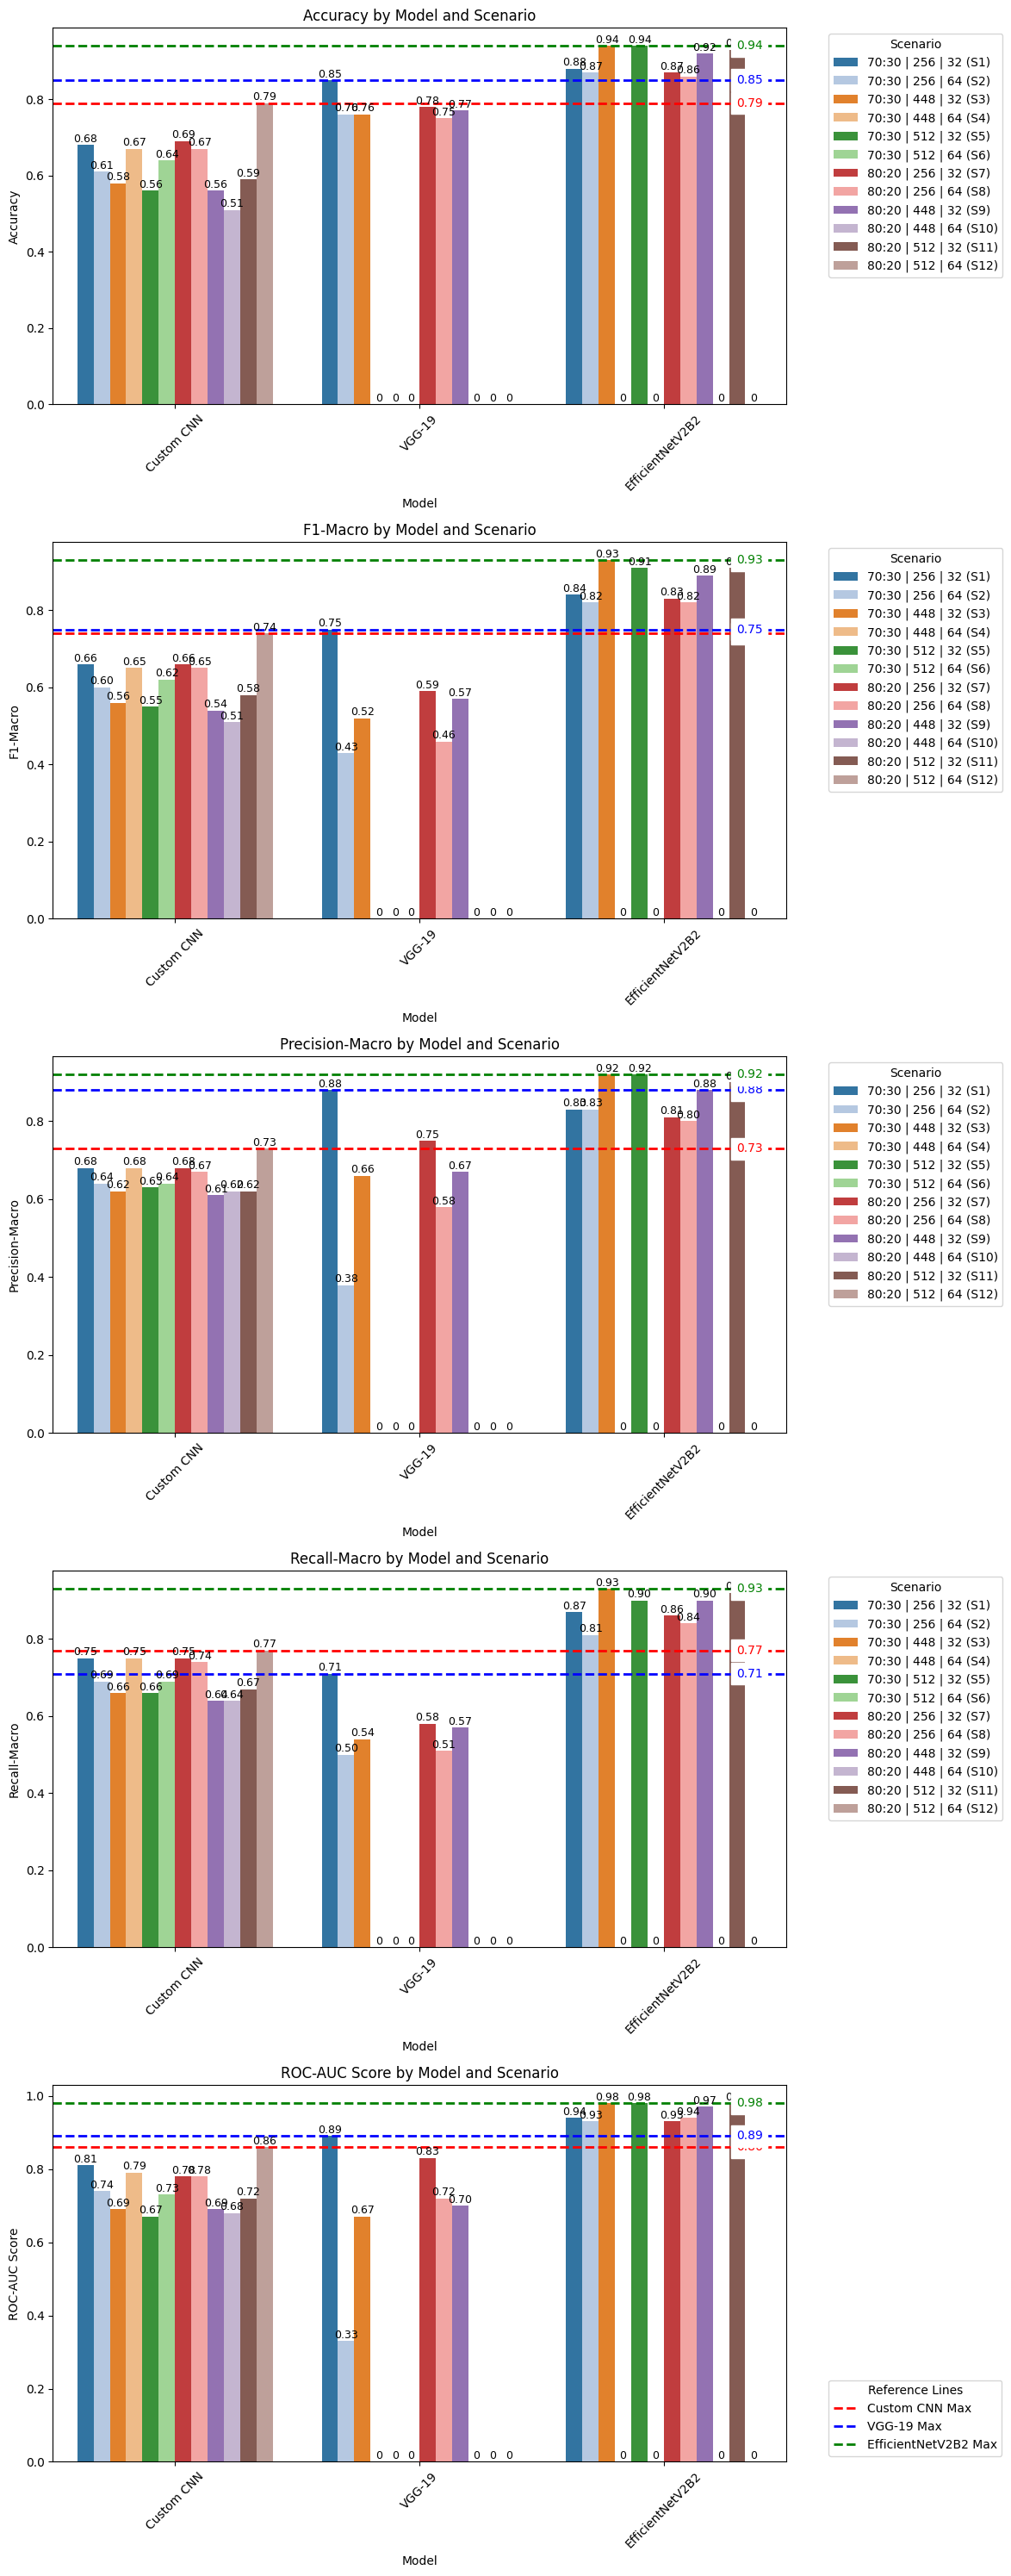

In [86]:
# Menentukan label legenda
# scenario_labels = [f'Scenario {i}' for i in range(1, 13)]
scenario_labels = combined_df['Keterangan Scenario'].to_list()

# Mengatur ukuran figure
plt.figure(figsize=(15, 30))

def add_value_labels(ax, spacing=5, fontsize=9):
    """Tambahkan nilai pada setiap batang plot, kecuali untuk nilai 0 atau 0.0"""
    for p in ax.patches:
        height = p.get_height()
        if height != 0:  # Only annotate if the height is not 0
            ax.annotate(f'{height:.2f}' if height % 1 != 0 else f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='center', 
                        xytext=(0, spacing), 
                        textcoords='offset points',
                        fontsize=fontsize)
        elif height == 0:
            ax.annotate(f'{height:.0f}' if height % 1 != 0 else f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='center', 
                        xytext=(0, spacing), 
                        textcoords='offset points',
                        fontsize=fontsize)

def add_reference_lines(ax, data, color_map):
    """Tambahkan garis referensi untuk nilai tertinggi dengan anotasi angka maksimum"""
    models = data['Model'].unique()
    reference_lines = []
    for model in models:
        # Calculate the maximum value
        max_value = data[data['Model'] == model].max(numeric_only=True).max()
        
        # Add the reference line
        line = ax.axhline(max_value, color=color_map[model], linestyle='--', linewidth=2,
                          label=f'{model} Max {max_value:.2f}')
        
        # Add the annotation for the maximum value on the reference line
        ax.text(x=0.95, y=max_value, s=f'{max_value:.2f}', color=color_map[model],
                ha='center', va='center', fontsize=10, backgroundcolor='white', 
                transform=ax.get_yaxis_transform())
        
        reference_lines.append(line)
    return reference_lines

# Warna untuk setiap model
color_map = {
    'Custom CNN': 'red',
    'VGG-19': 'blue',
    'EfficientNetV2B2': 'green'
}

# Plotting Accuracy
plt.subplot(5, 1, 1)
ax = sns.barplot(data=combined_df, x='Model', y='Accuracy', hue='Scenario', palette='tab20', ci=None)
plt.title('Accuracy by Model and Scenario')
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=scenario_labels, title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
add_value_labels(ax)
add_reference_lines(ax, combined_df[['Model', 'Accuracy']], color_map)

# Plotting F1-Macro
plt.subplot(5, 1, 2)
ax = sns.barplot(data=combined_df, x='Model', y='F1-Macro', hue='Scenario', palette='tab20', ci=None)
plt.title('F1-Macro by Model and Scenario')
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=scenario_labels, title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
add_value_labels(ax)
add_reference_lines(ax, combined_df[['Model', 'F1-Macro']], color_map)

# Plotting Precision-Macro
plt.subplot(5, 1, 3)
ax = sns.barplot(data=combined_df, x='Model', y='Precision-Macro', hue='Scenario', palette='tab20', ci=None)
plt.title('Precision-Macro by Model and Scenario')
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=scenario_labels, title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
add_value_labels(ax)
add_reference_lines(ax, combined_df[['Model', 'Precision-Macro']], color_map)

# Plotting Recall-Macro
plt.subplot(5, 1, 4)
ax = sns.barplot(data=combined_df, x='Model', y='Recall-Macro', hue='Scenario', palette='tab20', ci=None)
plt.title('Recall-Macro by Model and Scenario')
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=scenario_labels, title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
add_value_labels(ax)
add_reference_lines(ax, combined_df[['Model', 'Recall-Macro']], color_map)

# Plotting ROC-AUC Score
plt.subplot(5, 1, 5)
ax = sns.barplot(data=combined_df, x='Model', y='ROC-AUC Score', hue='Scenario', palette='tab20', ci=None)
plt.title('ROC-AUC Score by Model and Scenario')
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=scenario_labels, title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
add_value_labels(ax)
add_reference_lines(ax, combined_df[['Model', 'ROC-AUC Score']], color_map)

# Membuat legend untuk garis referensi
reference_labels = [Line2D([0], [0], color=color_map[model], linestyle='--', linewidth=2,
                           label=f'{model} Max') for model in color_map]
plt.legend(handles=reference_labels, title='Reference Lines', bbox_to_anchor=(1.05, 0), loc='lower left')

# Menampilkan plot
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Memberi ruang untuk legend di luar plot
plt.show()

In [91]:
# Function to convert time strings to seconds for easier plotting
def time_to_seconds(time_str):
    if isinstance(time_str, str):
        time_parts = time_str.split()
        if len(time_parts) == 4:
            return int(time_parts[0]) * 60 + int(time_parts[2])
        elif len(time_parts) == 2:
            return int(time_parts[0]) * 60
    return 0

combined_df['Training Time per Epoch (s/epoch)'] = combined_df['Training Time per Epoch'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else 0)
combined_df['Total Training Time (s)'] = combined_df['Total Training Time'].apply(time_to_seconds)


def add_reference_lines_mean(ax, data, color_map):
    """Tambahkan garis referensi untuk nilai rata-rata tanpa menghitung nilai 0 atau 0.0, dengan anotasi angka rata-rata"""
    models = data['Model'].unique()
    reference_lines = []
    for model in models:
        # Filter out 0 or 0.0 values
        valid_data = data[(data['Model'] == model) & (data.iloc[:, 1] != 0)]
        mean_value = valid_data.iloc[:, 1].mean()  # Calculate the mean of non-zero values
        
        # Add the reference line
        line = ax.axhline(mean_value, color=color_map[model], linestyle='--', linewidth=2,
                          label=f'{model} Mean {mean_value:.2f}')
        
        # Add the annotation for the mean value on the reference line
        ax.text(x=0.95, y=mean_value, s=f'{mean_value:.2f}', color=color_map[model],
                ha='center', va='center', fontsize=10, backgroundcolor='white', 
                transform=ax.get_yaxis_transform())
        
        reference_lines.append(line)
    return reference_lines

/tmp/ipykernel_33/1006992629.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=combined_df, x='Model', y='Epoch', hue='Scenario', palette='tab20', ci=None)
/tmp/ipykernel_33/1006992629.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=combined_df, x='Model', y='Training Time per Epoch (s/epoch)', hue='Scenario', palette='tab20', ci=None)
/tmp/ipykernel_33/1006992629.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=combined_df, x='Model', y='Total Training Time (s)', hue='Scenario', palette='tab20', ci=None)


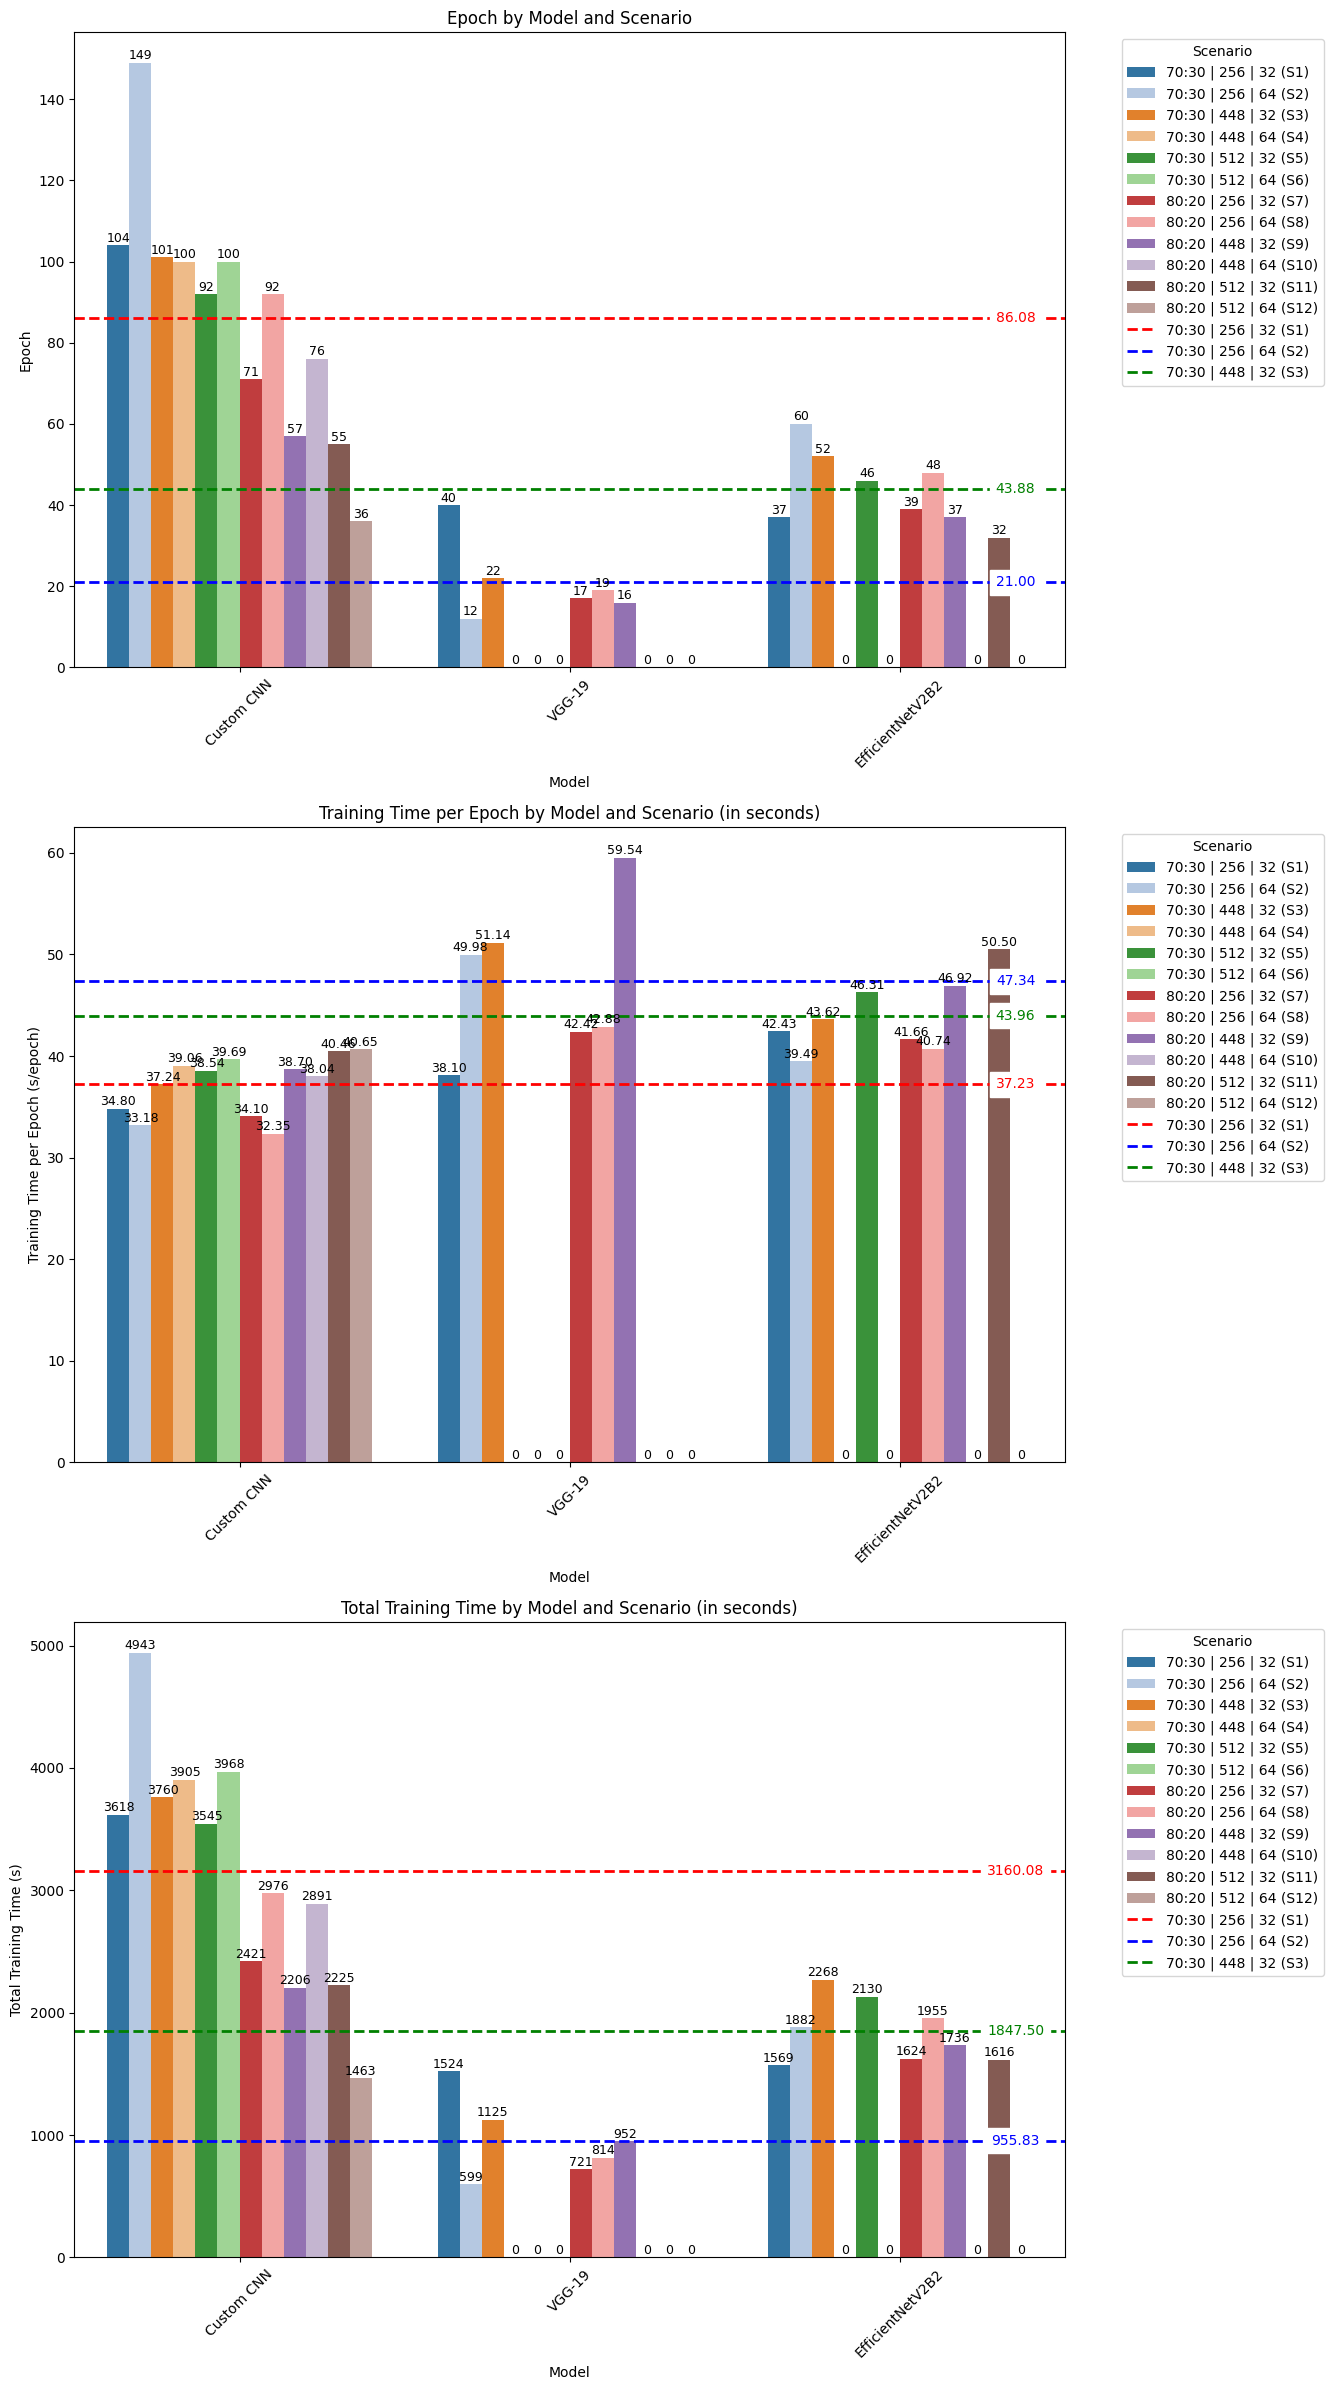

In [93]:
# Set up the figure for subplots
plt.figure(figsize=(17, 24))

# Plotting Epoch with Average Reference Line
plt.subplot(3, 1, 1)
ax = sns.barplot(data=combined_df, x='Model', y='Epoch', hue='Scenario', palette='tab20', ci=None)
plt.title('Epoch by Model and Scenario')
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
add_value_labels(ax)
reference_lines = add_reference_lines_mean(ax, combined_df[['Model', 'Epoch']], color_map)
ax.legend(handles=handles + reference_lines, labels=scenario_labels + [line.get_label() for line in reference_lines],
          title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting Training Time per Epoch with Average Reference Line
plt.subplot(3, 1, 2)
ax = sns.barplot(data=combined_df, x='Model', y='Training Time per Epoch (s/epoch)', hue='Scenario', palette='tab20', ci=None)
plt.title('Training Time per Epoch by Model and Scenario (in seconds)')
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
add_value_labels(ax)
reference_lines = add_reference_lines_mean(ax, combined_df[['Model', 'Training Time per Epoch (s/epoch)']], color_map)
ax.legend(handles=handles + reference_lines, labels=scenario_labels + [line.get_label() for line in reference_lines],
          title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting Total Training Time with Average Reference Line
plt.subplot(3, 1, 3)
ax = sns.barplot(data=combined_df, x='Model', y='Total Training Time (s)', hue='Scenario', palette='tab20', ci=None)
plt.title('Total Training Time by Model and Scenario (in seconds)')
plt.xticks(rotation=45)
handles, labels = ax.get_legend_handles_labels()
add_value_labels(ax)
reference_lines = add_reference_lines_mean(ax, combined_df[['Model', 'Total Training Time (s)']], color_map)
ax.legend(handles=handles + reference_lines, labels=scenario_labels + [line.get_label() for line in reference_lines],
          title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Adjusting layout to give space for the legends
plt.show()
